<a href="https://colab.research.google.com/github/rsskga/DS-Unit-2-Regression-Classification/blob/master/module1/assignment_regression_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [x] Look at the data. Choose a feature, and plot its relationship with the target.
- [x] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [x] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [x] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

# Setup

In [1]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module1')

Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
Already up to date.


In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv('../data/apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [53]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Imports and Exploration

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [50]:
df.dtypes
df.head(1)
df.describe()

bathrooms                      float64
bedrooms                         int64
created                 datetime64[ns]
description                     object
display_address                 object
latitude                       float64
longitude                      float64
price                            int64
street_address                  object
interest_level                  object
elevator                         int64
cats_allowed                     int64
hardwood_floors                  int64
dogs_allowed                     int64
doorman                          int64
dishwasher                       int64
no_fee                           int64
laundry_in_building              int64
fitness_center                   int64
pre-war                          int64
laundry_in_unit                  int64
roof_deck                        int64
outdoor_space                    int64
dining_room                      int64
high_speed_internet              int64
balcony                  

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.000000,48818.00000,48818.000000,48818.000000
mean,1.201790,1.537158,40.750756,-73.972758,3579.560982,0.524827,0.478266,0.478266,0.447622,0.424843,0.415072,0.367078,0.052767,0.268446,0.185649,0.175898,0.132758,0.138392,0.102831,0.087201,0.060469,0.055205,0.051907,0.046192,0.043304,0.042710,0.03933,0.027224,0.026240
std,0.470707,1.106078,0.038962,0.028887,1762.420875,0.499388,0.499533,0.499533,0.497254,0.494324,0.492740,0.482013,0.223571,0.443156,0.388827,0.380737,0.339317,0.345314,0.303741,0.282133,0.238357,0.228382,0.221842,0.209903,0.203542,0.202204,0.19438,0.162736,0.159851
min,0.000000,0.000000,40.571200,-74.087300,1375.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,1.000000,40.728300,-73.991800,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,40.751700,-73.978000,3150.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,2.000000,40.774000,-73.955000,4095.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,10.000000,8.000000,40.989400,-73.700100,15500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


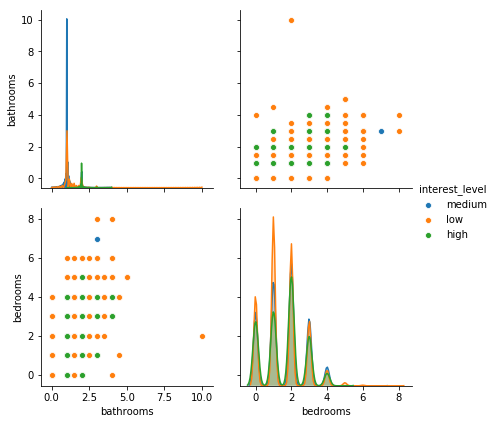

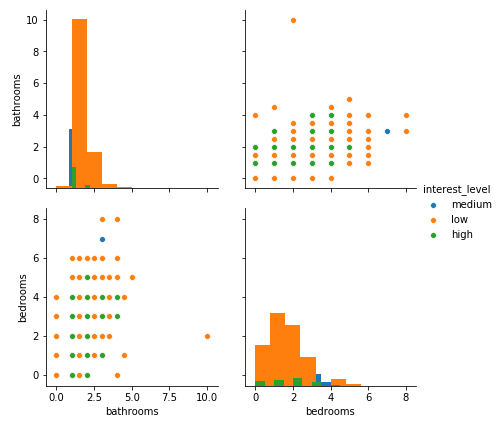

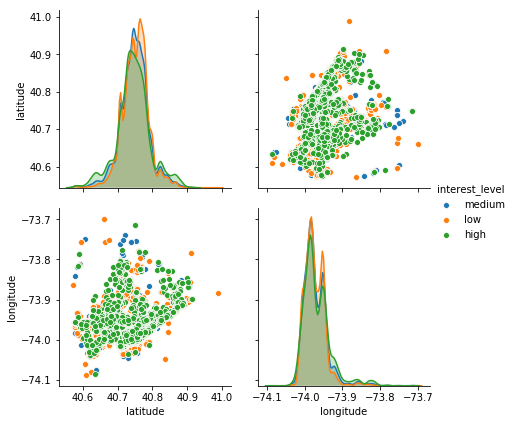

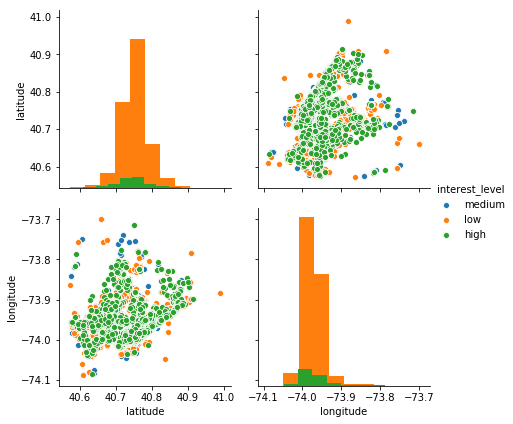

In [66]:
# sns.pairplot(data=df[['bathrooms', 'bedrooms', 'latitude', 'longitude',
#                       'elevator', 'hardwood_floors', 'doorman', 'fitness_center',
#                       'dishwasher', 'laundry_in_building', 'laundry_in_unit',
#                       'roof_deck', 'outdoor_space', 'dining_room', 'balcony',
#                       'high_speed_internet', 
#                       'cats_allowed', 
#                       'dogs_allowed', ]], hue='interest_level', dropna=True)

# plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},

sns.pairplot(data=df[['bathrooms', 'bedrooms', 'interest_level']], 
             hue='interest_level', dropna=True, height=3);

sns.pairplot(data=df[['bathrooms', 'bedrooms', 'interest_level']], 
             hue='interest_level', dropna=True, height=3, diag_kind='hist');

sns.pairplot(data=df[['latitude', 'longitude', 'interest_level']], 
             hue='interest_level', dropna=True, height=3);

sns.pairplot(data=df[['latitude', 'longitude', 'interest_level']], 
             hue='interest_level', dropna=True, height=3, diag_kind='hist');

# Regression

In [87]:
import plotly.express as px
px.scatter(df, x='longitude', y='price', trendline='ols')

In [0]:
from sklearn.linear_model import LinearRegression

In [80]:
model = LinearRegression(normalize=True)

features = ['longitude']
target = 'price'

X_train = df[features]
y_train = df[target]

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [81]:
X_train.describe()

,longitude
count,48818.000000
mean,-73.972758
std,0.028887
min,-74.087300
25%,-73.991800
50%,-73.978000
75%,-73.955000
max,-73.700100


In [82]:
y_train.describe()

count    48818.000000
mean      3579.560982
std       1762.420875
min       1375.000000
25%       2500.000000
50%       3150.000000
75%       4095.000000
max      15500.000000
Name: price, dtype: float64

In [83]:
longitude = -73.978
X_test = [[longitude]]

model.predict(X_test)

array([3659.84672291])

In [84]:
y_pred = model.predict(X_test)
print(f'Predicted price for {X_test} longitude apartment:\n' + str(y_pred))

Predicted price for [[-73.978]] longitude apartment:
[3659.84672291]


In [85]:
y_test = [[4_000]]
model.predict(y_test)

array([-62389785.27363579])

# Function

In [0]:
# Y = f(X) + ∈
# Here f is some fixed but unknown function of X1,...,Xp, and ∈ is a random
# error term, which is independent of X and has mean zero. In this formula- error term
# tion, f represents the systematic information that X provides about Y .

#  Yˆ = ˆf(X)
# where ˆf represents our estimate for f, and Yˆ represents the resulting prediction for Y . In this setting, ˆf is often treated as a black box, in the sense
# that one is not typically concerned with the exact form of ˆf, provided that
# it yields accurate predictions for Y